In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from IPython.display import Image

In [69]:
df = pd.read_csv('../data/iris.csv', names = ['sepal_length','sepal_width','patal_length', 'petal_width', 'target'])
df.head()

,sepal_length,sepal_width,patal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
feature = df[df.columns[:2]]
target = df[df.columns[4]]

target.replace({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':1}, inplace = True)

target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [71]:
clf = SVC(kernel = 'linear', C = 1)
clf.fit(feature, target)

SVC(C=1, kernel='linear')

### 그래프에서 결정 경계선이 될 실선을 구해보자         
ax + by + c = 0 에서 식을 y만 남기고 넘긴채 위의 변수들을 적용함

In [72]:
# coef가 기울기, intercept는 절편

w = clf.coef_[0]  # 가중치 값
a = -w[0] / w[1]  # 기울기값 구하기
xx = np.linspace(4, 8) # X 정의역 설정

yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성

### 마진 간격을 구해보자          
여기서 알아야 할 개념
- 한 점과 한 직선 사이의 거리 공식
- ||w|| : 놈 (norm)

In [73]:
# 수학적으로 결정 경계 (separating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음

margin = 1/np.sqrt(np.sum(clf.coef_**2)) 
# 기울기 제곱한것의 합의 제곱근을 분수로 만들었음
# 입실론 설정 = 1 / ||w|| = 1/가중치 벡터의 놈(norm)

# 마진 간격을 구했으니 실선에서 마진 간격 만큼 떨어져 있는 두개의 직선을 구할 수 있다. 그럼 서포트 벡터를 구분할 직선 2개를 구할 수 있다.

### 구해진 마진 간격을 이용하여 벡터 직선 2개를 구해보자

In [74]:
yy_down = yy - np.sqrt(1 + a**2) * margin     # 아래 서포트 벡터 직선
yy_up = yy + np.sqrt(1 + a**2) * margin       # 위  서포트 벡터 직선

##### 이유는 사진 why_code_02 에서 확인

### 그래프 그려보자

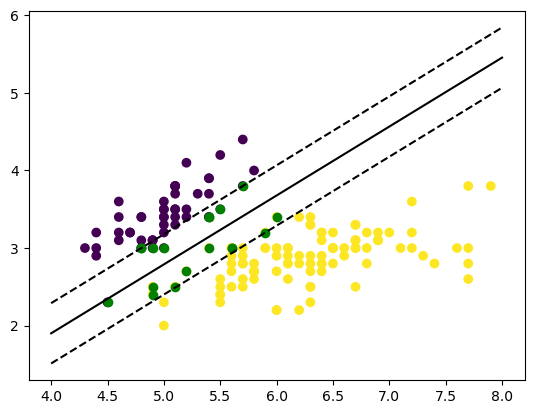

In [75]:
plt.plot(xx, yy, 'k-') #결정 경계 그리기
plt.plot(xx, yy_down, 'k--') #주변 서포트 벡터1
plt.plot(xx, yy_up, 'k--') #주변 서포트 벡터2


# 데이터 점들 찍기
plt.scatter(feature['sepal_length'].values, feature['sepal_width'].values, c = target.values)

# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], color = 'green')
plt.show()

#####  관련 수학적 설명은 why_code.jpg 참고